In [3]:
import sys
import os
import inspect

# Assuming your scripts directory is one level up from the notebooks directory
sys.path.append(os.path.abspath("../Scripts"))

import importlib
import my_functions as mf
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
from scipy.stats import gaussian_kde
import autograd.numpy as anp 
import sampyl as smp
from scipy.integrate import odeint
import pandas as pd
import sunode.wrappers.as_pytensor as sun
from my_functions import *
from scipy.integrate import solve_ivp
import pysindy as ps
from mpl_toolkits.mplot3d import Axes3D

importlib.reload(mf)
functions_list = inspect.getmembers(mf, inspect.isfunction)
# Print the names of the functions
Fnc_nms = [function[0] for function in functions_list]
Fnc_nms

['Hudson_bay_data',
 'calculate_noise_statistics',
 'defvjp',
 'estimate_noise_statistics',
 'expand_2D_array',
 'gaussian_process_interpolation',
 'generate_samples',
 'grad_safe_sqrt',
 'load_csv_to_array',
 'mean_squared_error',
 'odeint',
 'plot_kde_matrix',
 'plot_paths',
 'primitive',
 'safe_sqrt',
 'safe_std',
 'save_array_to_csv',
 'set_publcn_matplotlib_defaults']

In [4]:
# Define the Lorenz system
def lorenz(t, z):
    sigma = 10
    rho = 28
    beta = 8 / 3
    x, y, z = z
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

{'noise_means': array([ 0.00010331, -0.00142749, -0.04260055]), 'noise_stds': array([0.05168648, 0.05083147, 1.13541995]), 'noise_percentages': array([5.24295028, 4.90709643, 4.82960516]), 'snrs': array([19.07323066, 20.37864985, 20.70562636])}


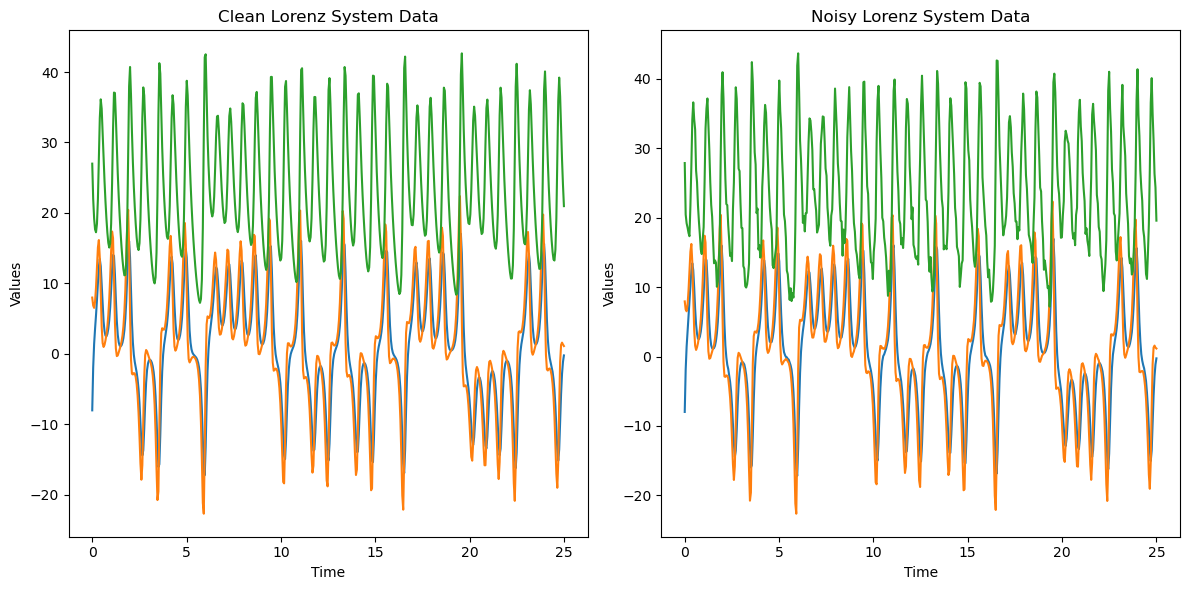

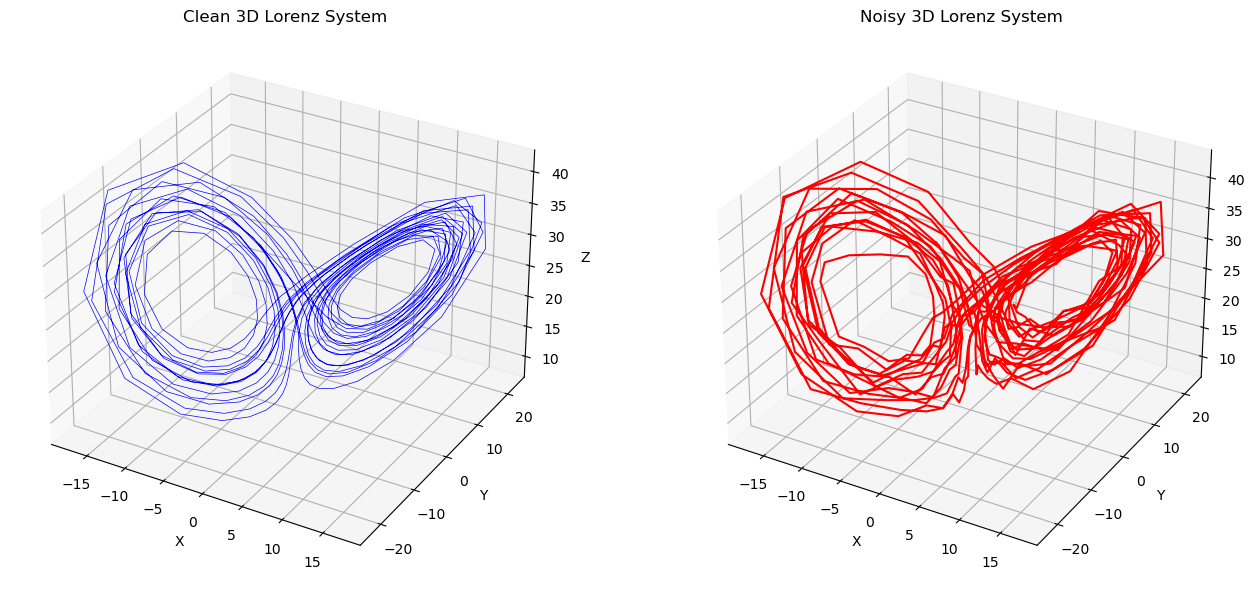

In [5]:
# Time points
t = np.linspace(0, 25, 500)

# Initial conditions
y0 = [-8, 8, 27]

# Solve the Lorenz system
sol = solve_ivp(lorenz, t_span=(t[0], t[-1]), y0=y0, t_eval=t)

# Extract the solution
x_clean = sol.y.T

# noise percentage of the mean
ns_pct = 5/100

# Add lognormal multiplicative noise
rng = np.random.default_rng(seed=42)
noise = rng.normal(np.zeros(x_clean.shape[-1]), ns_pct*np.mean(x_clean,0), size=x_clean.shape)
x_noisy = x_clean + noise

# Get noise information
print(mf.calculate_noise_statistics(x_clean, x_noisy))

# Plot the clean and noisy data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(t, x_clean)
plt.title('Clean Lorenz System Data')
plt.xlabel('Time')
plt.ylabel('Values')

plt.subplot(1, 2, 2)
plt.plot(t, x_noisy)
plt.title('Noisy Lorenz System Data')
plt.xlabel('Time')
plt.ylabel('Values')

plt.tight_layout()
plt.show()

# Plot the 3D Lorenz systems side by side
fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(121, projection='3d')
ax1.plot(x_clean[:, 0], x_clean[:, 1], x_clean[:, 2], lw=0.5, color='blue')
ax1.set_title('Clean 3D Lorenz System')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

ax2 = fig.add_subplot(122, projection='3d')
ax2.plot(x_noisy[:, 0], x_noisy[:, 1], x_noisy[:, 2], color='red') #, alpha = 0.7)
ax2.set_title('Noisy 3D Lorenz System')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')

plt.tight_layout()
plt.show()

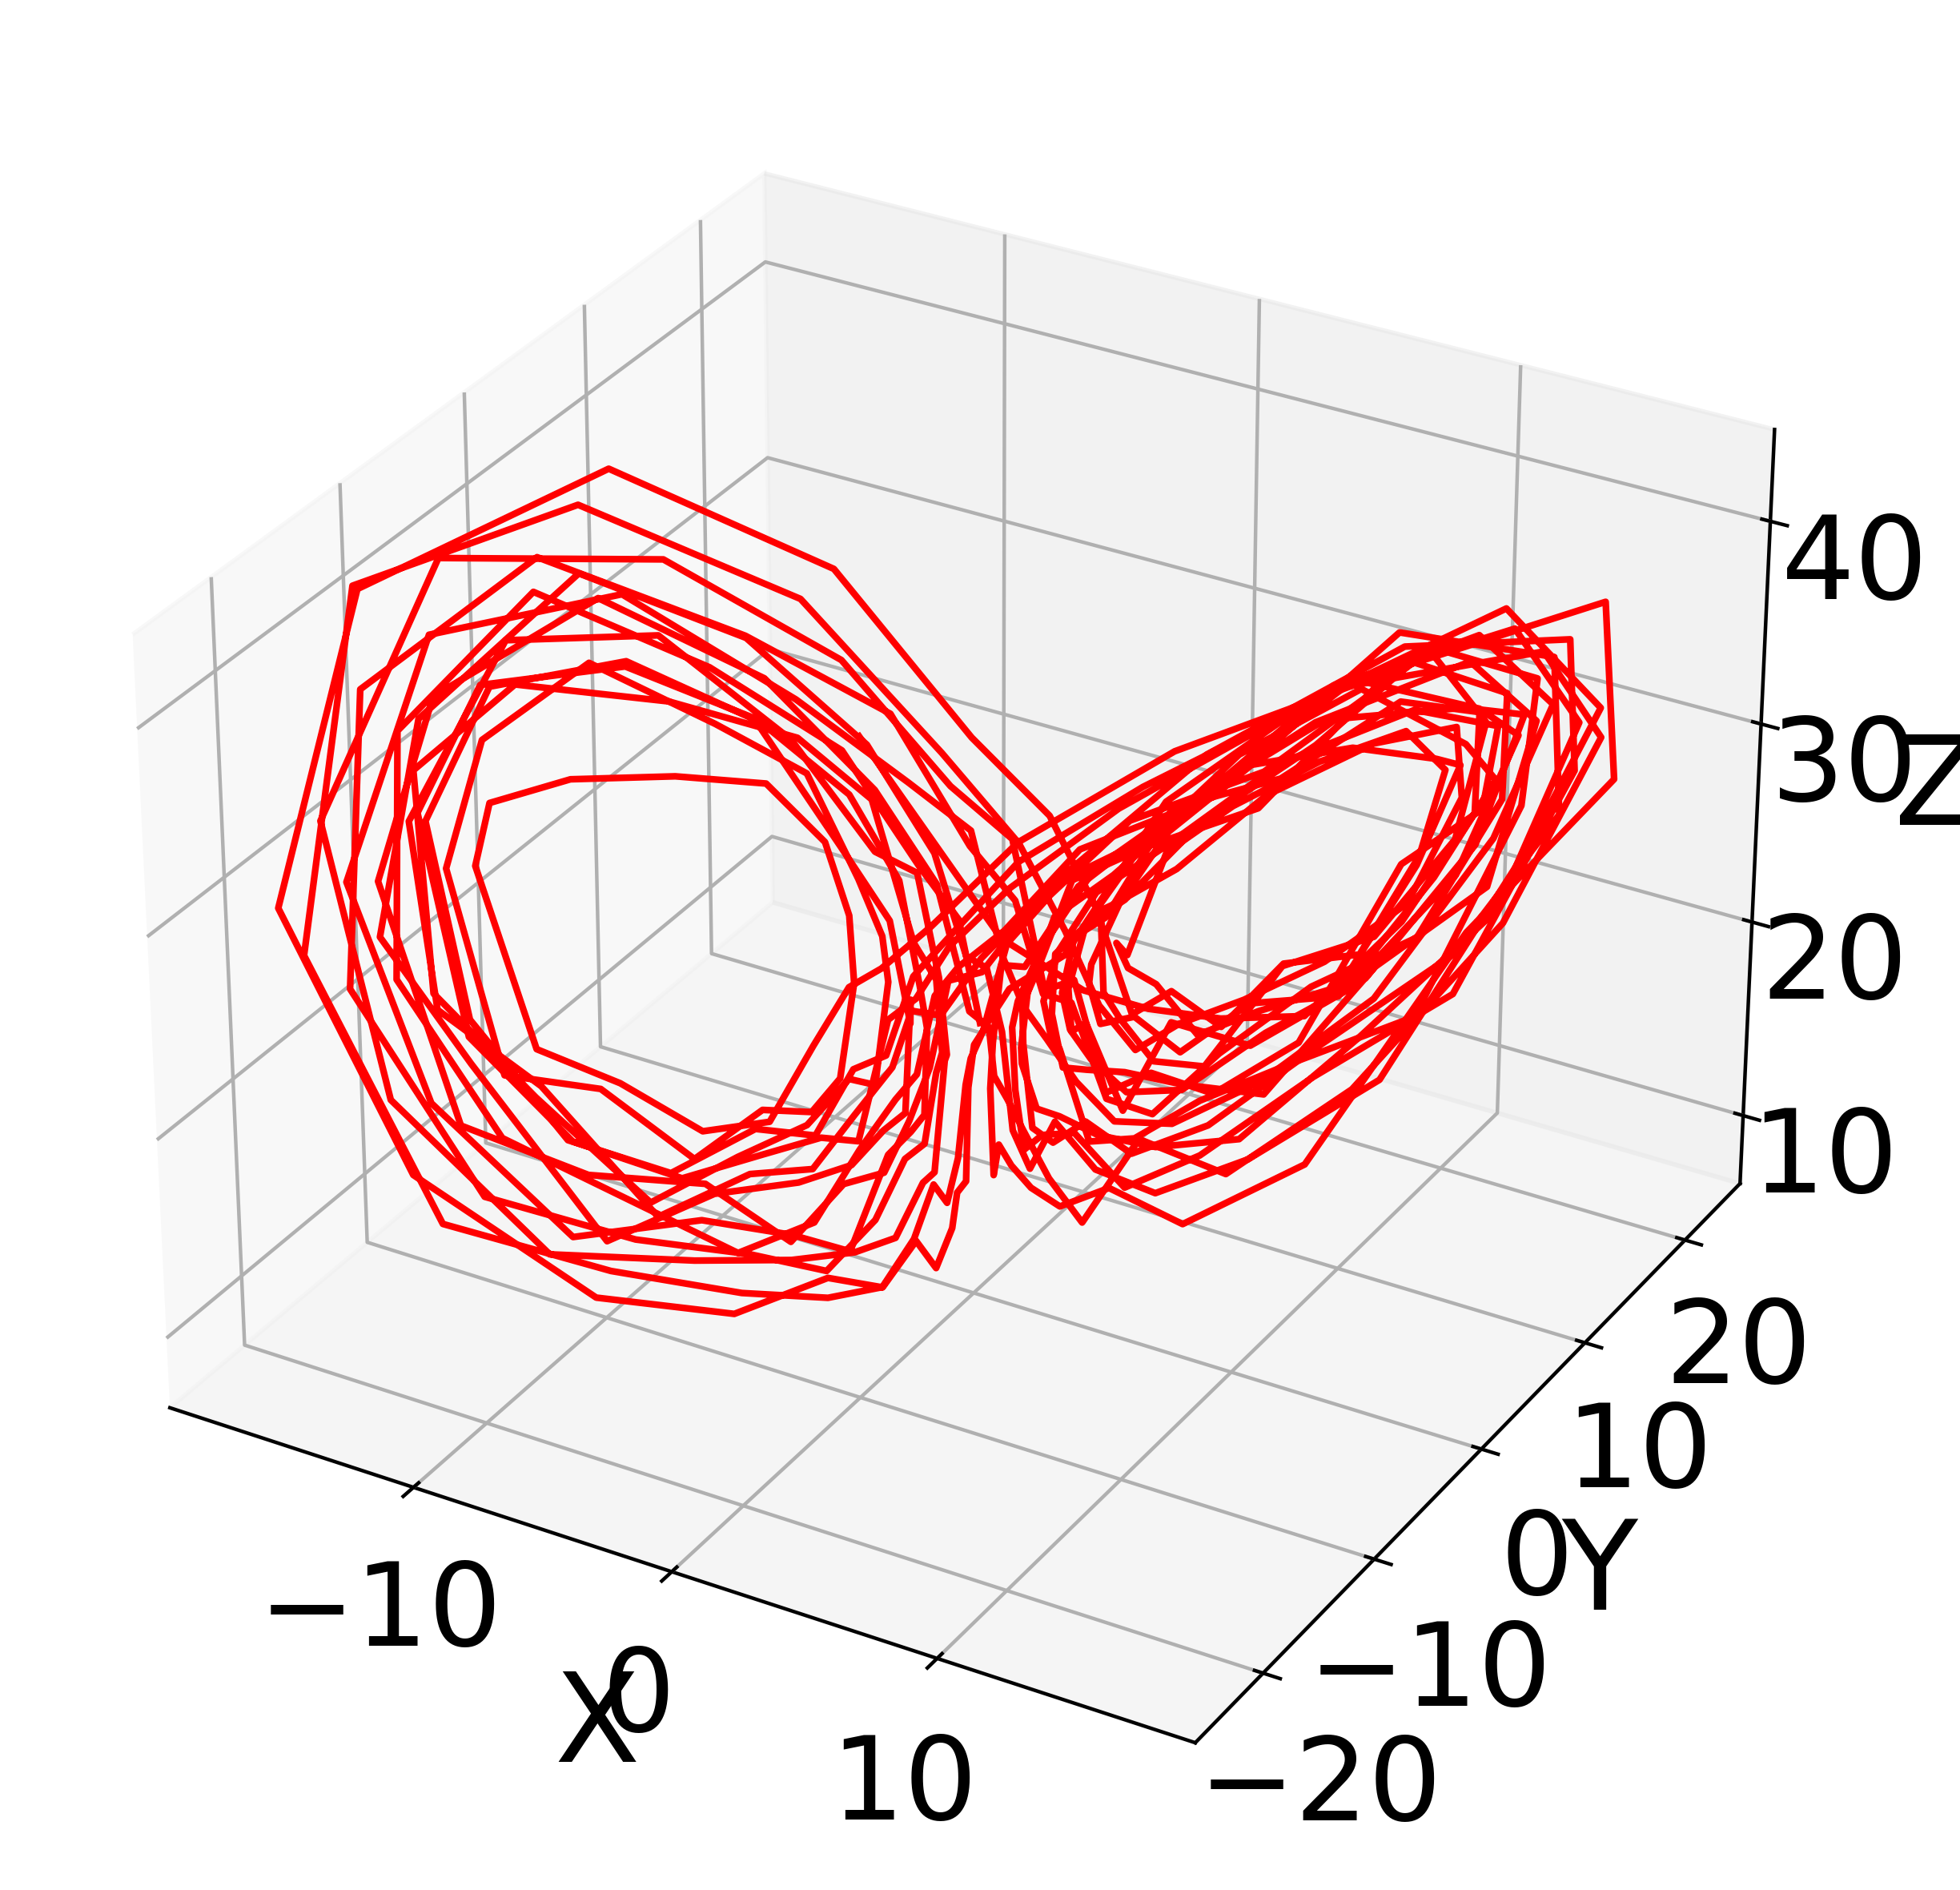

In [6]:


# Create a new figure with a specified size
fig = plt.figure(figsize=(12, 6), dpi = 400)

# Add a single 3D axis to the figure
ax = fig.add_subplot(111, projection='3d')

# Plot the data on the 3D axis
ax.plot(x_noisy[:, 0], x_noisy[:, 1], x_noisy[:, 2], color='red')  #, alpha=0.7)

# Set title and axis labels using the axis methods
# ax.set_title('Noisy 3D Lorenz System', fontsize=28)
ax.set_xlabel('X', fontsize=28)
ax.set_ylabel('Y', fontsize=28)
ax.set_zlabel('Z', fontsize=28)

# Increase tick label sizes on all three axes
ax.tick_params(axis='x', labelsize=26)
ax.tick_params(axis='y', labelsize=26)
ax.tick_params(axis='z', labelsize=26)

# Adjust layout to ensure everything is visible
plt.tight_layout()

# Display the figure
plt.show()


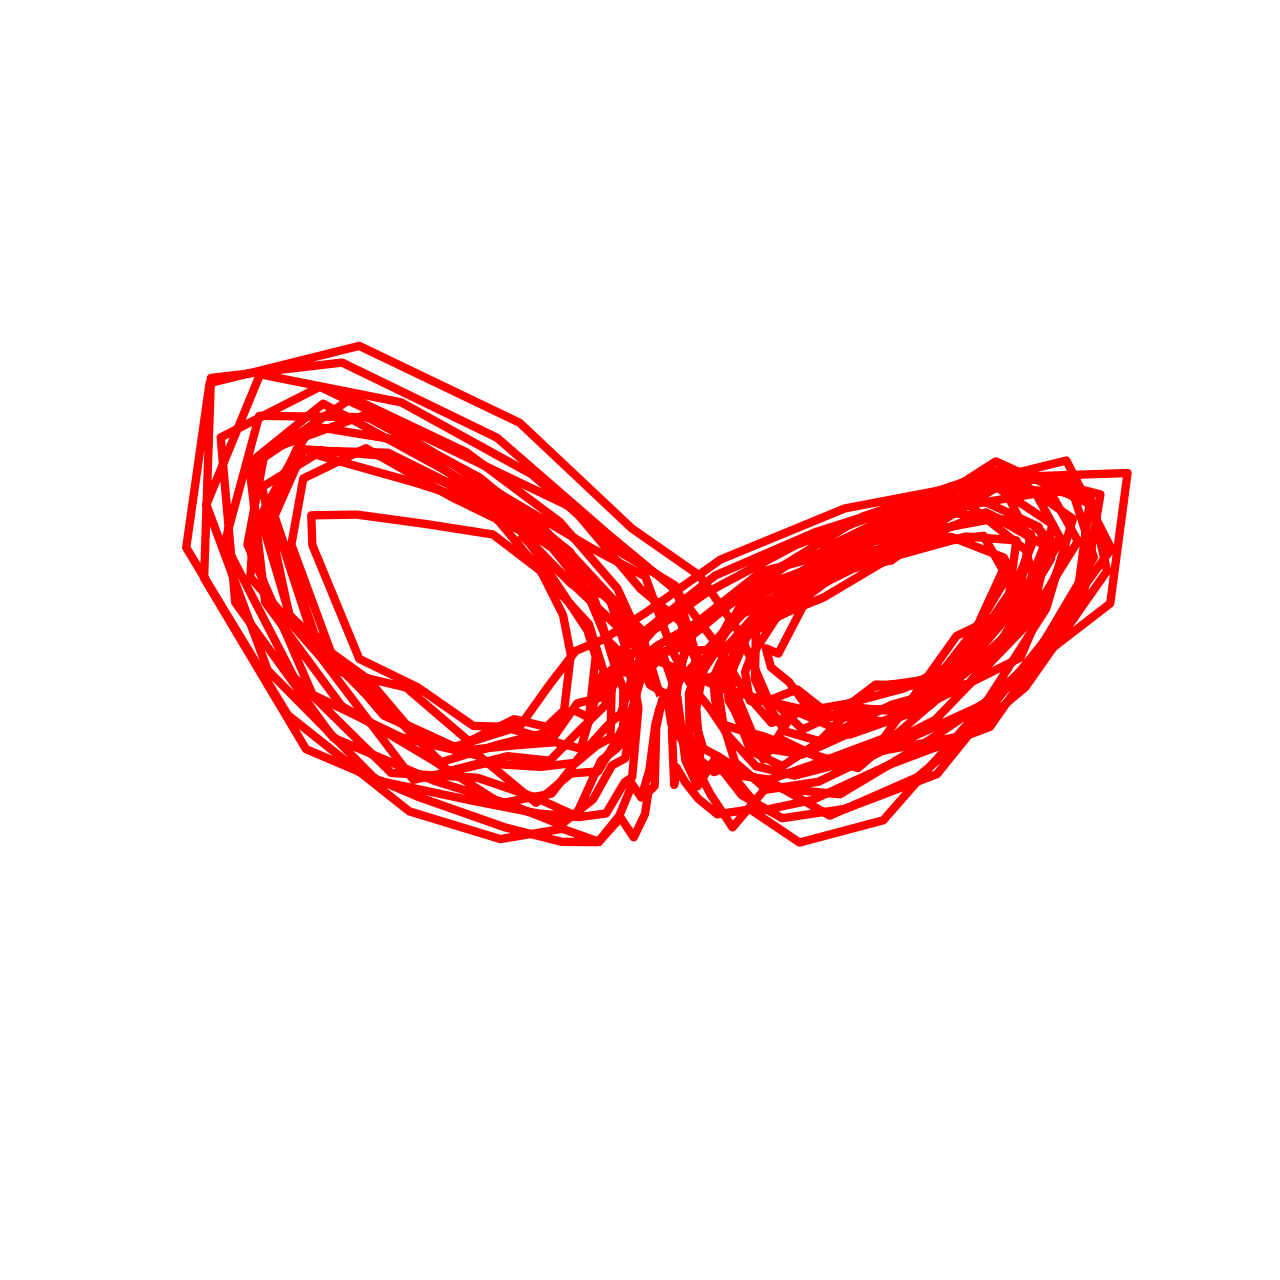

In [19]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create the figure with the target size
fig = plt.figure(figsize=(6, 3), dpi=400)

# Add 3D axis
ax = fig.add_subplot(111, projection='3d')

# Plot the trajectory
ax.plot(x_noisy[:, 0], x_noisy[:, 1], x_noisy[:, 2], color='red')

# Set camera angle for a stretched triangular perspective
ax.view_init(elev=20, azim=-60)

# Stretch axes to fill the rectangle better
ax.set_box_aspect([2, 1, 1])  # X:Y:Z

# Remove axes, labels, and ticks
ax.set_axis_off()

# Manually expand the axis area to reduce white borders
ax.set_position([0.0, 0.0, 1.0, 1.0])  # [left, bottom, width, height]

# Render the plot
plt.show()


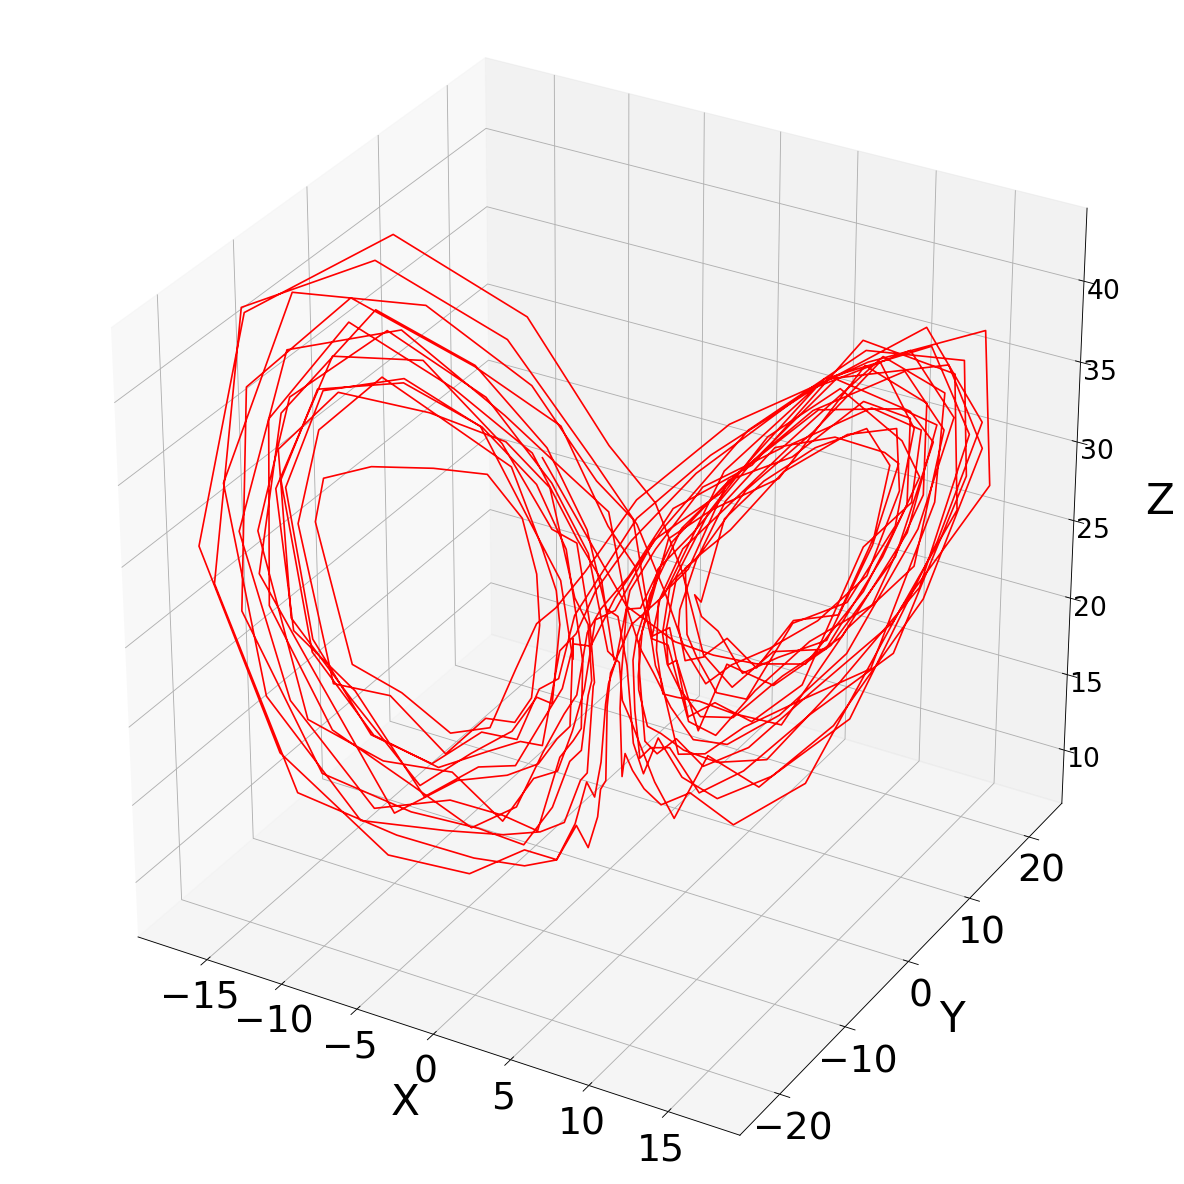

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a large enough figure
fig = plt.figure(figsize=(20, 20), dpi=80)

# Add 3D axis
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D noisy data
ax.plot(x_noisy[:, 0], x_noisy[:, 1], x_noisy[:, 2], color='red')

# Set axis labels with large font and padding
ax.set_xlabel('X', fontsize=38, labelpad=20)
ax.set_ylabel('Y', fontsize=38, labelpad=20)
ax.set_zlabel('Z', fontsize=38, labelpad=30)  # Increase Z label pad further

# Larger tick sizes
ax.tick_params(axis='x', labelsize=34)
ax.tick_params(axis='y', labelsize=34)
ax.tick_params(axis='z', labelsize=24)

# Fix the box aspect ratio so that axes are not squashed
ax.set_box_aspect([1, 1, 1])  # Equal aspect ratio for x/y/z

# Adjust margins further to make room for Z label
fig.subplots_adjust(left=0.15, right=0.88, bottom=0.15, top=0.90)

# Save to file with bbox_inches='tight' (forces renderer to consider text outside bounds)
fig.savefig("fixed_plot.png", bbox_inches='tight')

# Display
plt.show()


In [8]:
# Define the SINDy model with STLSQ optimizer and increased threshold
threshold = 0.25
model = ps.SINDy(optimizer=ps.STLSQ(threshold=threshold))

# Fit the SINDy model
model.fit(x_noisy, t=t)  # Use the time step size for t
model.print()

# Display the feature names
feature_names = model.get_feature_names()
print("Feature names in the library:")
print(feature_names)

# Display coefficients and score
lorentz_sindy_coeffs = model.coefficients()
score = model.score(x_noisy, t=0.002)

# Predict and plot
lorentz_sindy_pred = model.simulate(x_noisy[0], t)

(x0)' = -9.471 x0 + 9.473 x1
(x1)' = 0.322 1 + 22.328 x0 + -0.838 x0 x2
(x2)' = -1.749 1 + -2.457 x2 + 0.942 x0 x1
Feature names in the library:
['1', 'x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']


In [8]:
lorentz_sindy_coeffs

array([[ 0.        , -9.47107393,  9.4732905 ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.32223062, 22.32834419,  0.        ,  0.        ,  0.        ,
         0.        , -0.83836299,  0.        ,  0.        ,  0.        ],
       [-1.74894932,  0.        ,  0.        , -2.45666295,  0.        ,
         0.94162971,  0.        ,  0.        ,  0.        ,  0.        ]])

In [9]:
xtrue = [0,10,10,0,0,0,0,0,0,0]
ytrue = [0,28,0,0,0,-1,-1,0,0,0]
ztrue = [0,0,0,8/3,1,0,0,0,0,0]


x_sindy_mse = mean_squared_error(xtrue, lorentz_sindy_coeffs[0])
y_sindy_mse = mean_squared_error(ytrue, lorentz_sindy_coeffs[1])
z_sindy_mse = mean_squared_error(ztrue, lorentz_sindy_coeffs[2])


safe_sqrt(x_sindy_mse),safe_sqrt(y_sindy_mse),safe_sqrt(z_sindy_mse)

(6.159546596126576, 1.8247640605530457, 1.7661822270354748)

Coefficients:
 [[ 0.    -9.471  9.473  0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.322 22.328  0.     0.     0.     0.    -0.838  0.     0.     0.   ]
 [-1.749  0.     0.    -2.457  0.     0.942  0.     0.     0.     0.   ]]
Score: 0.07609766760711045


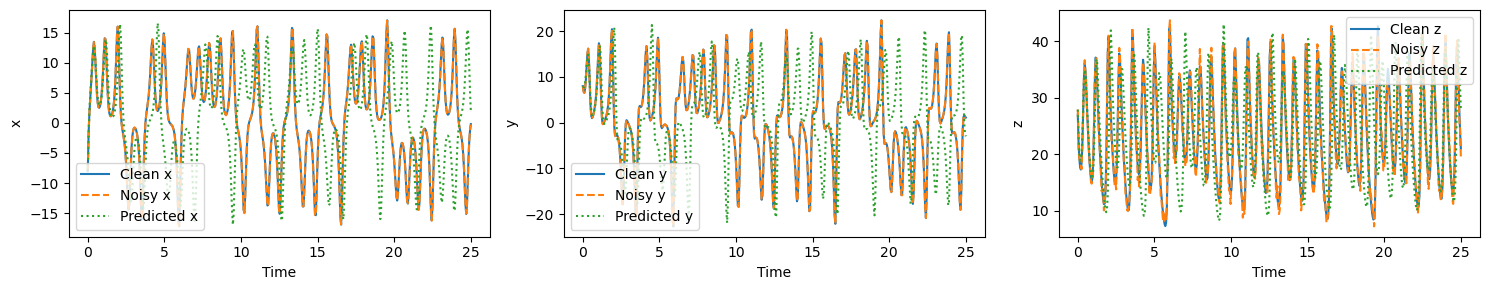

In [10]:
#Store important data
save_array_to_csv(x_noisy, 'lorentz_observed.csv')
save_array_to_csv(x_clean, 'lorentz_clean.csv')
save_array_to_csv(lorentz_sindy_coeffs, 'lorentz_sindy_coeffs.csv')
save_array_to_csv(lorentz_sindy_pred, 'lorentz_sindy_pred.csv')

print("Coefficients:\n", lorentz_sindy_coeffs.round(3))
print("Score:", score)


plt.figure(figsize=(15, 3))
plt.subplot(1, 3, 1)
plt.plot(t, x_clean[:, 0], label='Clean x')
plt.plot(t, x_noisy[:, 0], '--', label='Noisy x')
plt.plot(t, lorentz_sindy_pred[:, 0], ':', label='Predicted x')
plt.xlabel('Time')
plt.ylabel('x')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(t, x_clean[:, 1], label='Clean y')
plt.plot(t, x_noisy[:, 1], '--', label='Noisy y')
plt.plot(t, lorentz_sindy_pred[:, 1], ':', label='Predicted y')
plt.xlabel('Time')
plt.ylabel('y')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(t, x_clean[:, 2], label='Clean z')
plt.plot(t, x_noisy[:, 2], '--', label='Noisy z')
plt.plot(t, lorentz_sindy_pred[:, 2], ':', label='Predicted z')
plt.xlabel('Time')
plt.ylabel('z')
plt.legend()

plt.tight_layout()
plt.show()

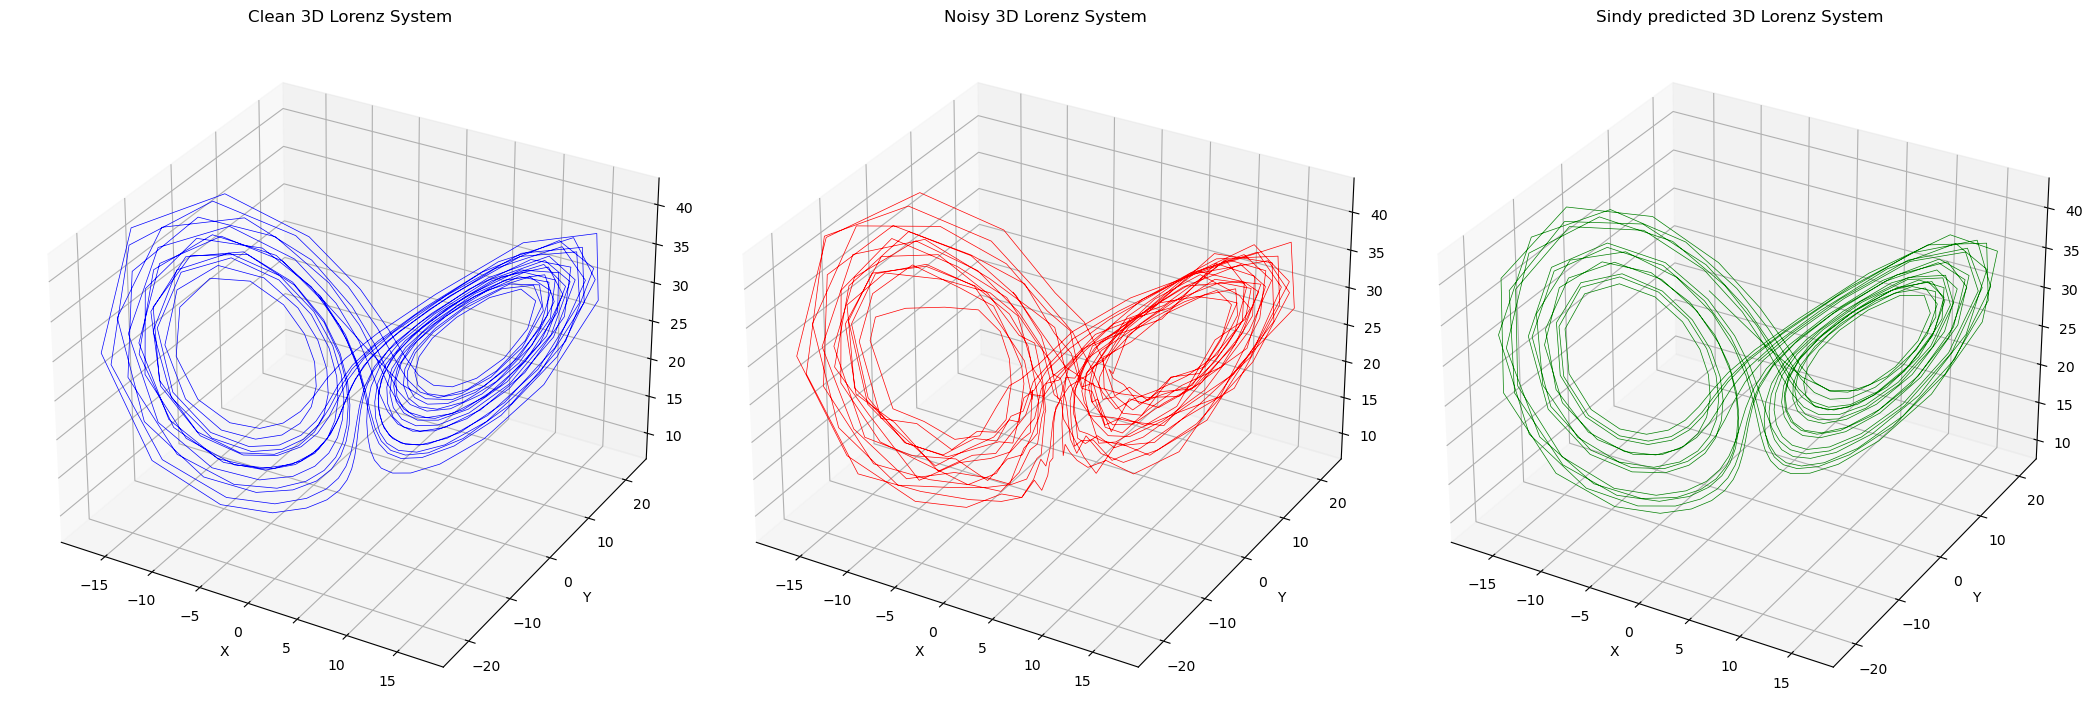

In [11]:
# Plot the 3D Lorenz systems side by side
fig = plt.figure(figsize=(21, 9))

ax1 = fig.add_subplot(131, projection='3d')
ax1.plot(x_clean[:, 0], x_clean[:, 1], x_clean[:, 2], lw=0.5, color='blue')
# ax1.plot(lorentz_sindy_pred[:, 0], lorentz_sindy_pred[:, 1], lorentz_sindy_pred[:, 2], lw=0.5, color='green', linestyle = '--')
ax1.set_title('Clean 3D Lorenz System')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

ax2 = fig.add_subplot(132, projection='3d')
ax2.plot(x_noisy[:, 0], x_noisy[:, 1], x_noisy[:, 2], lw=0.5, color='red')
# ax2.plot(lorentz_sindy_pred[:, 0], lorentz_sindy_pred[:, 1], lorentz_sindy_pred[:, 2], lw=0.5, color='green', linestyle = '--')
ax2.set_title('Noisy 3D Lorenz System')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')

ax3 = fig.add_subplot(133, projection='3d')
ax3.plot(lorentz_sindy_pred[:, 0], lorentz_sindy_pred[:, 1], lorentz_sindy_pred[:, 2], lw=0.5, color='green')
ax3.set_title('Sindy predicted 3D Lorenz System')
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
ax3.set_zlabel('Z')

plt.tight_layout()
plt.show()